# Project Outline sentiment Analysis World cup 2022



Load data and Preprocessing
Text Vectorization
Train a Naive Bayes Classifier
Make Predictions and Evaluate
Data Visualization

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from sklearn.svm import SVC
from bs4 import BeautifulSoup
import spacy  

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\publi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data

In [2]:
#Load data and Preprfifa_world_cup_2022_tweetsocessing
data = pd.read_csv('fifa_world_cup_2022_tweets.csv')
data.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [3]:
data_clean = data.copy()

# Preprocessing

In [4]:
data_clean.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [5]:
# drop clomn sentiment

data_clean = data_clean.drop("Sentiment", axis=1)
data_clean.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h..."


In [6]:
# from colomn Date Created 
# we create two columns minutes and hours

data_clean['minutes'] = pd.to_datetime(data_clean['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.minute
data_clean['hours'] = pd.to_datetime(data_clean['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.hour

In [7]:
data_clean.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,minutes,hours
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,59,23
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,59,23
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,58,23
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,58,23
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",58,23


In [8]:
# describe data_clean

data_clean.describe()


,Unnamed: 0,Number of Likes,minutes,hours
count,22524.000000,22524.000000,22524.000000,22524.000000
mean,11261.500000,23.822856,26.029435,14.211419
std,6502.263068,2128.018705,17.880917,4.139668
min,0.000000,0.000000,0.000000,0.000000
25%,5630.750000,0.000000,10.000000,13.000000
50%,11261.500000,0.000000,23.000000,16.000000
75%,16892.250000,2.000000,41.000000,16.000000
max,22523.000000,316867.000000,59.000000,23.000000


In [9]:
# information from data

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   minutes          22524 non-null  int64 
 6   hours            22524 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [10]:
# information data using unique

data_clean.nunique()

Unnamed: 0         22524
Date Created       14412
Number of Likes      271
Source of Tweet      109
Tweet              22360
minutes               60
hours                 24
dtype: int64

In [11]:
# we are looking for missing values

data_clean.isna().sum()

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
minutes            0
hours              0
dtype: int64

No missing values in the data_clean

In [12]:
# the top 10 source of tweet

data_clean['Source of Tweet'].value_counts().head(10)

Twitter for iPhone          9507
Twitter for Android         6820
Twitter Web App             4505
TweetDeck                    386
Twitter for iPad             240
Qualtrics Social Connect     165
Hootsuite Inc.               146
Buffer                        71
Instagram                     62
Tweetbot for iΟS              52
Name: Source of Tweet, dtype: int64

Twitter for iPhone is the top source of tweet

In [13]:
# Nomber of likes

liked = data_clean.sort_values(by=['Number of Likes'], ascending=False)
liked.head(10)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,minutes,hours
1287,1287,2022-11-20 19:39:11+00:00,316867,Twitter for iPhone,I can’t express my gratitude and happiness for...,39,19
17359,17359,2022-11-20 12:41:31+00:00,31517,Twitter Media Studio,Football Legend Eric Cantona reminds football ...,41,12
21267,21267,2022-11-20 06:17:00+00:00,20016,Twitter Web App,⚽️ #BitKeep FootBall Carnival Main Event is co...,17,6
528,528,2022-11-20 22:20:55+00:00,5847,TweetDeck,WATCH: BTS's #Jungkook Performs At #WorldCup20...,20,22
20073,20073,2022-11-20 09:05:12+00:00,5555,Twitter for iPhone,The 👑 Leo with Louis Vuitton 💧 #WorldCup2022 h...,5,9
15332,15332,2022-11-20 14:57:02+00:00,5484,Twitter Web App,Need them at the World Cup opening ceremony 😮\...,57,14
20101,20101,2022-11-20 09:02:09+00:00,5430,TweetDeck,WATCH: #BTS's #Jungkook Shares His Support For...,2,9
212,212,2022-11-20 23:06:08+00:00,3172,Twitter Media Studio,"""It's Palestine...""\n\nLebanese fans refuse to...",6,23
1635,1635,2022-11-20 19:00:00+00:00,2428,Sprinklr Publishing,".@reymysterio, @fightbobby, @BiancaBelairWWE a...",0,19
5761,5761,2022-11-20 16:23:30+00:00,2370,Twitter for Android,Qatar's Goalkeeper 😂\n\n#WorldCup2022 https://...,23,16


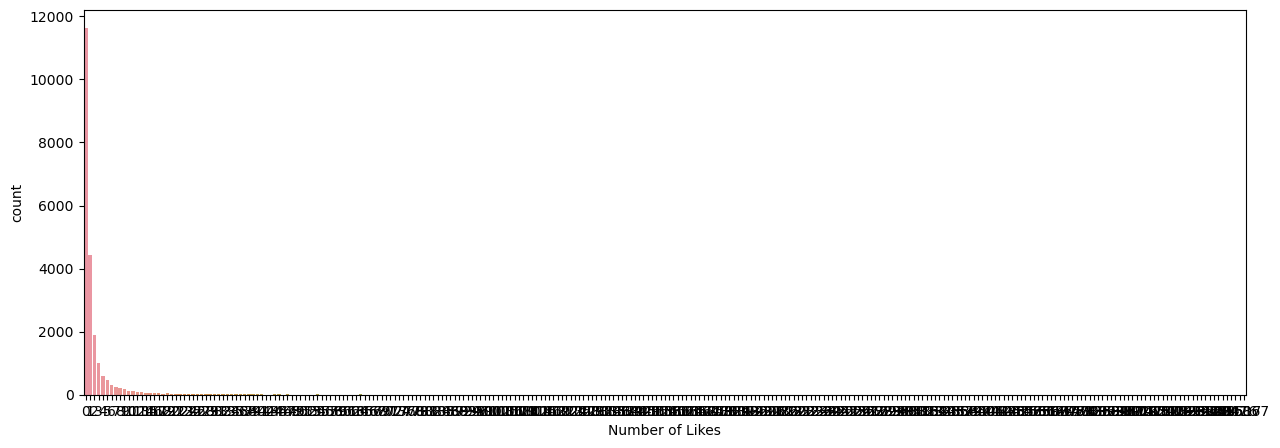

In [14]:
# plot figure nomber of likes

plt.figure(figsize = (15,5));
sns.countplot(data = data_clean , x = "Number of Likes");

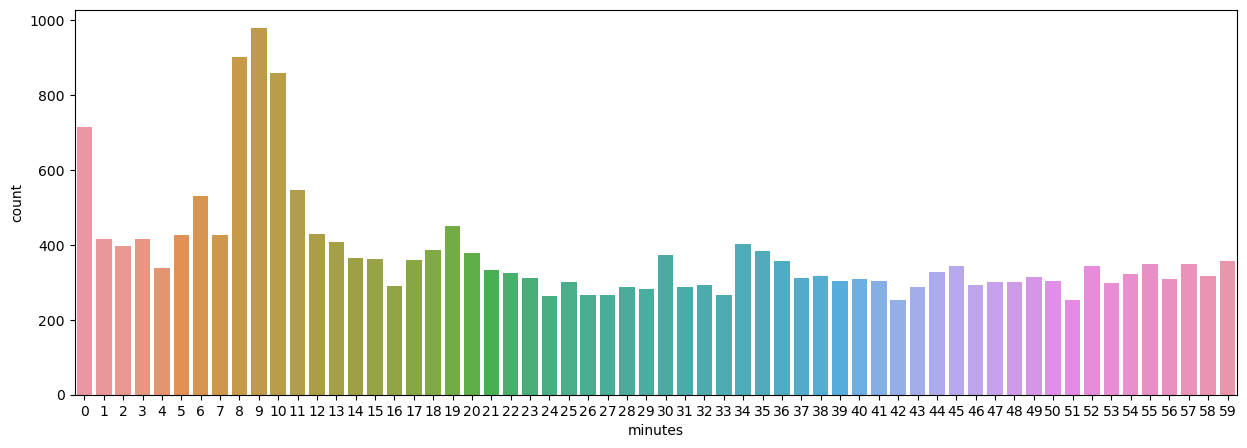

In [15]:
# plot the top minutes

plt.figure(figsize = (15,5));
sns.countplot(data = data_clean , x = "minutes");


                   the top minutes is 9 so let's see wich hour in this minute is top hour have tweets

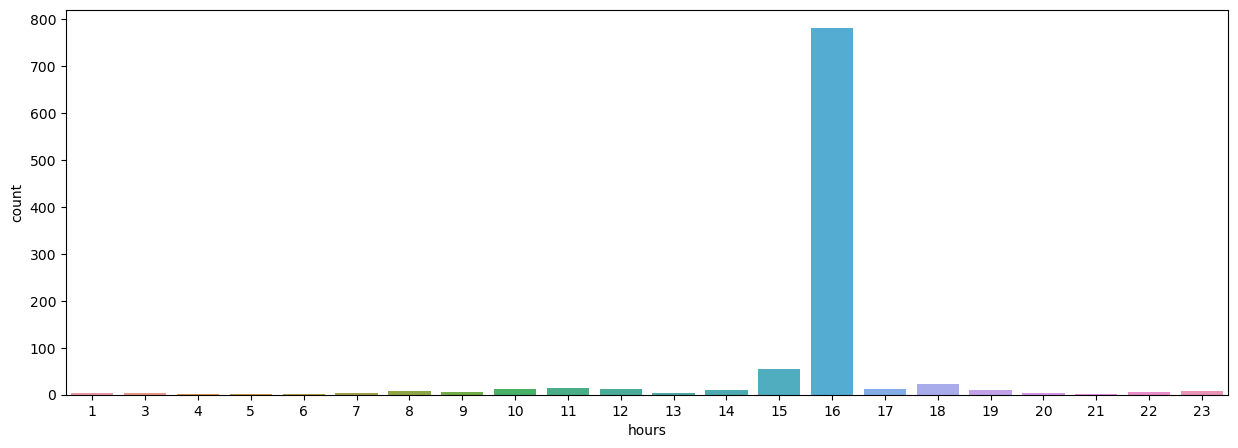

In [16]:
# plot top hours for minutes = 9

top_hours = data_clean[data_clean['minutes'] == 9]
plt.figure(figsize = (15,5));
sns.countplot(data = top_hours , x = "hours");

                                    as the result get that the hour 16 is the top

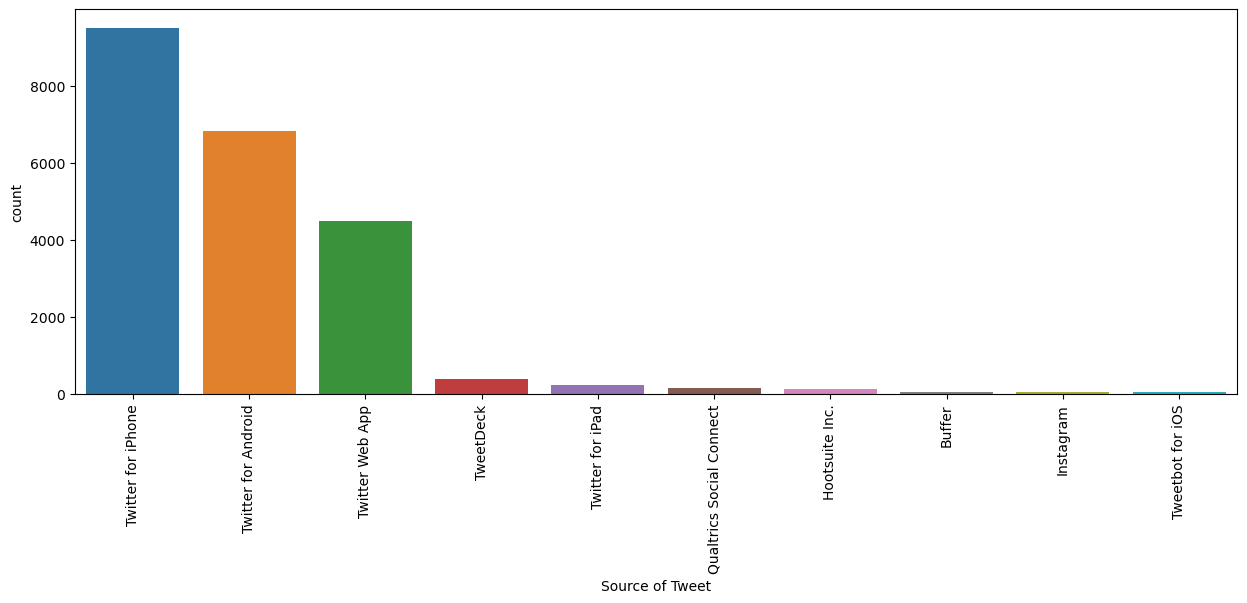

In [17]:
# plot the top 10 source of tweet

plt.figure(figsize = (15,5));
sns.countplot(data = data_clean , x = "Source of Tweet" ,
              order = data_clean['Source of Tweet'].value_counts(ascending = False).iloc[:10].index);

plt.xticks(rotation = 90);


                                    as the result get that the Twitter for iPhone is the top source

# Preprocessing the tweets

In [18]:
# fonction cleaning repeating char in the tweet

import re

def cleaning_repeating_char(Tweet):
    return re.sub(r'(.)1+', r'1', Tweet)
data_clean['Tweet'] = data_clean['Tweet'].apply(lambda x: cleaning_repeating_char(x))
data_clean['Tweet'].tail()

22519              Here We go World cup 2022 #WorldCup2022
22520    Anderlecht confirms former Viborg FF's Jesper ...
22521    Great thread to read before the start of #Worl...
22522    Raphinha wants Brazil to be united at the #Wor...
22523    How to buy $SOT on PinkSale?🤔\n\nHave you been...
Name: Tweet, dtype: object

In [19]:
# fonction to cleaning urls in the tweet

def cleaning_URLs(data_clean):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data_clean)
data_clean['Tweet'] = data_clean['Tweet'].apply(lambda x: cleaning_URLs(x))
data_clean['Tweet'].head()

0    What are we drinking today @TucanTribe \n@MadB...
1    Amazing @CanadaSoccerEN  #WorldCup2022 launch ...
2         Worth reading while watching #WorldCup2022  
3    Golden Maknae shinning bright\n\n shook #BTS #...
4    If the BBC cares so much about human rights, h...
Name: Tweet, dtype: object

In [20]:
# Cleaning and removing Numeric numbers

def cleaning_numbers(data_clean):
    return re.sub('[0-9]+', '', data_clean)
data_clean['Tweet'] = data_clean['Tweet'].apply(lambda x: cleaning_numbers(x))
data_clean['Tweet'].head()

0    What are we drinking today @TucanTribe \n@MadB...
1    Amazing @CanadaSoccerEN  #WorldCup launch vide...
2             Worth reading while watching #WorldCup  
3    Golden Maknae shinning bright\n\n shook #BTS #...
4    If the BBC cares so much about human rights, h...
Name: Tweet, dtype: object

In [21]:
#code to clean and remove puncutation

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Tweet):
    translator = str.maketrans('', '', punctuations_list)
    return Tweet.translate(translator)
data_clean['Tweet']= data_clean['Tweet'].apply(lambda x: cleaning_punctuations(x))
data_clean['Tweet'].tail()

22519                       Here We go World cup  WorldCup
22520    Anderlecht confirms former Viborg FFs Jesper F...
22521    Great thread to read before the start of World...
22522    Raphinha wants Brazil to be united at the Worl...
22523    How to buy SOT on PinkSale🤔\n\nHave you been c...
Name: Tweet, dtype: object

In [22]:
def cleaning(doc):
    
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    
    txt = [token.lemma_ for token in doc if not token.is_stop]
    
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    
    if len(txt) > 2:
        return ' '.join(txt)


In [23]:
# cleaning data for word long and make in lower

brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in data_clean['Tweet'])


In [24]:
# make size for tweet and calculate time cleaning

from time import time
from gensim.models import Word2Vec
t = time()
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))
data_clean.tail(5)

Time to clean up everything: 3.19 mins


,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,minutes,hours
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup WorldCup,0,0
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FFs Jesper F...,0,0
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of World...,0,0
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the Worl...,0,0
22523,22523,2022-11-20 00:00:00+00:00,24,Twitter Web App,How to buy SOT on PinkSale🤔\n\nHave you been c...,0,0


In [25]:
# supprimer duplicates tweet

df_clean = pd.DataFrame({'cTweet': txt})
df_clean = df_clean.dropna().drop_duplicates()
print(df_clean.shape)
df_clean.head(10)

(20862, 1)


,cTweet
0,drink today tucantribe madbear lkincalgo algoa...
1,amazing canadasocceren worldcup launch video s...
2,worth reading watch worldcup
3,golden maknae shin bright shake bts worldcup f...
4,bbc care human right homosexual right woman ri...
5,like mexican fan able scream puto homophobic q...
6,look like jamaican football team naw follow wo...
7,football monday morning need pinch happen worl...
8,world cup start qatar s black awareness day br...
9,worldcup itvsport amp lfsystemmusic hungry love


23018


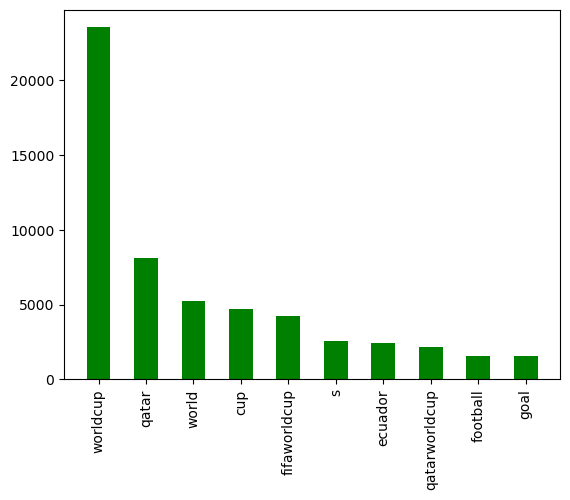

In [26]:
# How many unique words in the vocabulary?

import itertools

all_words = " ".join([sentence for sentence in df_clean['cTweet']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))
hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()

the top unique words for all words but can see 's' is not important words

In [27]:
# frequent dictionnaire

freq_dict

{'drink': 79,
 'today': 1053,
 'tucantribe': 1,
 'madbear': 1,
 'lkincalgo': 1,
 'algoanna': 1,
 'worldcup': 23549,
 'amazing': 193,
 'canadasocceren': 12,
 'launch': 35,
 'video': 109,
 'show': 211,
 'face': 89,
 'canada': 69,
 'man': 282,
 's': 2537,
 'national': 202,
 'team': 1347,
 'change': 123,
 'world': 5232,
 'cup': 4700,
 'entry': 25,
 't': 883,
 'wait': 302,
 'boy': 96,
 'action': 76,
 'fifa': 1548,
 'open': 247,
 'worth': 46,
 'reading': 6,
 'watch': 1254,
 'golden': 97,
 'maknae': 18,
 'shin': 4,
 'bright': 8,
 'shake': 7,
 'bts': 102,
 'fifakook': 55,
 'btstwt': 108,
 'bbc': 280,
 'care': 64,
 'human': 199,
 'right': 583,
 'homosexual': 4,
 'woman': 122,
 'opening': 1417,
 'ceremony': 902,
 'say': 221,
 'censor': 4,
 'like': 834,
 'mexican': 6,
 'fan': 610,
 'able': 55,
 'scream': 20,
 'puto': 1,
 'homophobic': 9,
 'qatar': 8137,
 'fifaworldcup': 4220,
 'look': 578,
 'jamaican': 2,
 'football': 1562,
 'naw': 2,
 'follow': 175,
 'monday': 69,
 'morning': 88,
 'need': 282,
 

Even after removing the stop words using spicy, we still have some words like 'S' in the dataset 
and those can be removed using NLTK.

In [30]:
# Removing stop words using nltk lib

from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text

tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('not')
stopword_list.remove('no')
stopword_list.remove('but')
stopword_list.remove("won't")
stopword_list.remove("isn't")
stopword_list.remove('very')

print(stopword_list)
#Removing standard english stopwords like prepositions, adverbs

stop = set(stopwords.words('english'))
#stop.remove('not')
#stop.remove('no')
#stop.remove('but')
#stop.remove("won't")
#stop.remove("isn't")

print("NLTK stop word lists \n")
print(stop)
#Removing the stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can

In [31]:
# stop words remove words not important polarity in machine
df_clean['cTweet'] = df_clean['cTweet'].apply(remove_stopwords)
df_clean.head(10)

,cTweet
0,drink today tucantribe madbear lkincalgo algoa...
1,amazing canadasocceren worldcup launch video s...
2,worth reading watch worldcup
3,golden maknae shin bright shake bts worldcup f...
4,bbc care human right homosexual right woman ri...
5,like mexican fan able scream puto homophobic q...
6,look like jamaican football team naw follow wo...
7,football monday morning need pinch happen worl...
8,world cup start qatar black awareness day braz...
9,worldcup itvsport amp lfsystemmusic hungry love


In [32]:
# How many unique words in the vocabulary?

all_words = " ".join([sentence for sentence in df_clean['cTweet']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))
voc_freq_dict

22967


{'worldcup': 23549,
 'qatar': 8137,
 'world': 5232,
 'cup': 4700,
 'fifaworldcup': 4220,
 'ecuador': 2410,
 'qatarworldcup': 2139,
 'football': 1562,
 'goal': 1550,
 'fifa': 1548,
 'game': 1449,
 'opening': 1417,
 'team': 1347,
 'watch': 1254,
 'start': 1212,
 'good': 1177,
 'win': 1127,
 'match': 1115,
 'today': 1053,
 'offside': 1001,
 'worldcupqatar': 997,
 'not': 945,
 'var': 924,
 'ceremony': 902,
 'go': 881,
 'time': 856,
 'like': 834,
 'let': 831,
 'amp': 777,
 'england': 763,
 'play': 739,
 'host': 712,
 'player': 703,
 'live': 699,
 'qatecu': 649,
 'day': 628,
 'fan': 610,
 'get': 594,
 'right': 583,
 'look': 578,
 'valencia': 577,
 'jungkook': 560,
 'come': 557,
 'vs': 543,
 'country': 540,
 'tournament': 526,
 'know': 513,
 'minute': 511,
 'think': 483,
 'people': 458,
 'score': 454,
 'kick': 449,
 'great': 445,
 'year': 437,
 'group': 436,
 'soccer': 431,
 'bet': 426,
 'begin': 412,
 'stadium': 385,
 'corruption': 385,
 'support': 372,
 'sport': 358,
 'big': 354,
 'love': 3

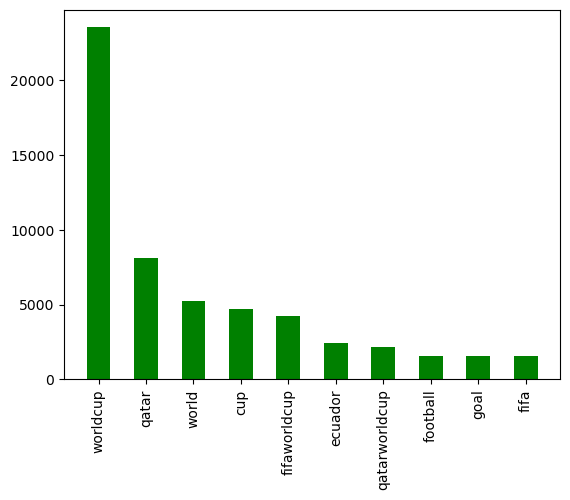

In [33]:
# top 10 words with frequency.

hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()

we still have some words like 'S' in the dataset is removed using NLTK.

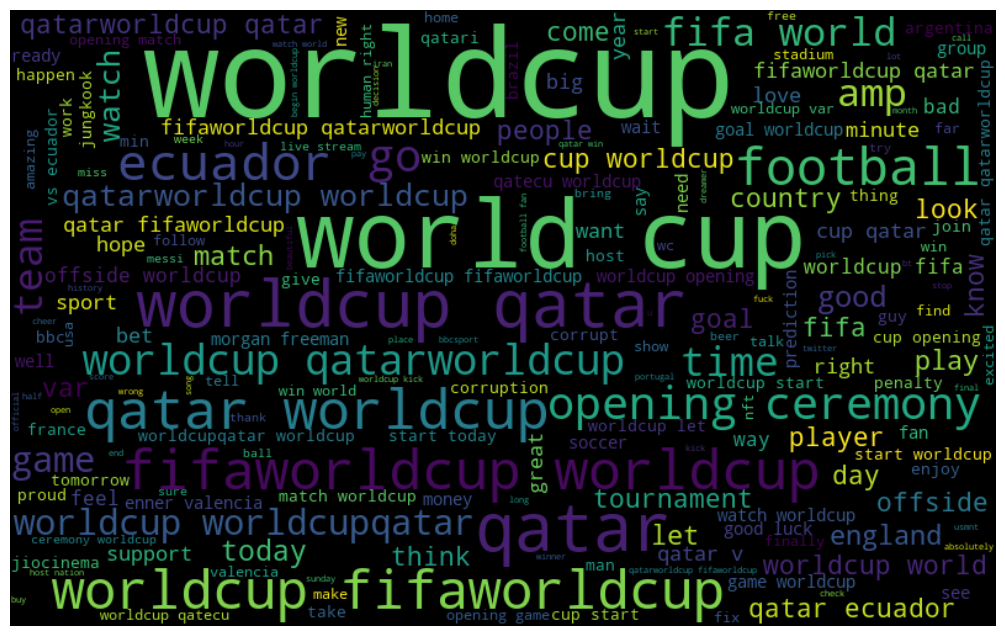

In [34]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df_clean['cTweet']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud visualize important word in colomn tweet

In [35]:
!pip3 install textblob


In [36]:
from textblob import TextBlob

#calculating polarity for categorizing text 

def polarity(cTweet):
    return TextBlob(cTweet).sentiment.polarity

In [37]:
# polarity for tweets

df_clean["polarity"] = df_clean["cTweet"].apply(polarity)
df_clean.head(10)


,cTweet,polarity
0,drink today tucantribe madbear lkincalgo algoa...,0.000000
1,amazing canadasocceren worldcup launch video s...,0.233333
2,worth reading watch worldcup,0.300000
3,golden maknae shin bright shake bts worldcup f...,0.500000
4,bbc care human right homosexual right woman ri...,0.214286
5,like mexican fan able scream puto homophobic q...,0.250000
6,look like jamaican football team naw follow wo...,0.000000
7,football monday morning need pinch happen worl...,0.000000
8,world cup start qatar black awareness day braz...,-0.111111
9,worldcup itvsport amp lfsystemmusic hungry love,0.500000


In [38]:
#  Adding Sentiment to the data frame

def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [39]:
# create colomn sentiment

df_clean['sentiment'] = df_clean['polarity'].apply(sentiment)
df_clean.head(10)


,cTweet,polarity,sentiment
0,drink today tucantribe madbear lkincalgo algoa...,0.000000,Neutral
1,amazing canadasocceren worldcup launch video s...,0.233333,Positive
2,worth reading watch worldcup,0.300000,Positive
3,golden maknae shin bright shake bts worldcup f...,0.500000,Positive
4,bbc care human right homosexual right woman ri...,0.214286,Positive
5,like mexican fan able scream puto homophobic q...,0.250000,Positive
6,look like jamaican football team naw follow wo...,0.000000,Neutral
7,football monday morning need pinch happen worl...,0.000000,Neutral
8,world cup start qatar black awareness day braz...,-0.111111,Negative
9,worldcup itvsport amp lfsystemmusic hungry love,0.500000,Positive


# Preprocessing of data df_clean


In [40]:
# length of data

print('length of data is', len(df_clean))


length of data is 20862


In [41]:
df_clean.shape

(20862, 3)

In [42]:
# missing values in df_clean

df_clean.isnull( ).sum( )


cTweet       0
polarity     0
sentiment    0
dtype: int64

In [43]:
df_clean['sentiment'].value_counts()


Neutral     9362
Positive    7916
Negative    3584
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

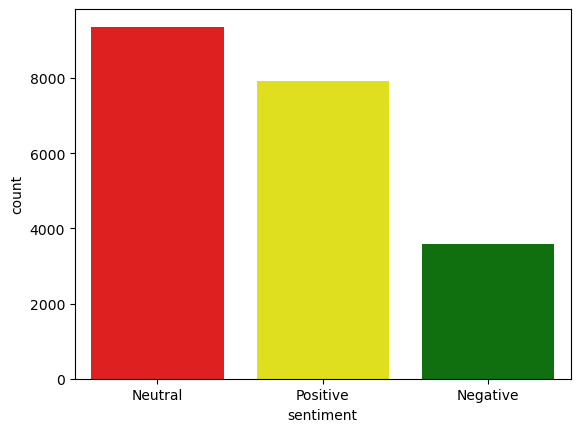

In [44]:
#Count of Type of Sentiment

custom_palette = ["red", "yellow", "green"]
sns.countplot(data=df_clean, x='sentiment', palette=custom_palette)

we can see the Neutral sentiments is the top next the Positive sentiment tweets

In [45]:
# drop neutral sentiment

df_clean.drop(df_clean.loc[df_clean['sentiment']=='Neutral'].index, inplace=True)
df_clean.head(10)

,cTweet,polarity,sentiment
1,amazing canadasocceren worldcup launch video s...,0.233333,Positive
2,worth reading watch worldcup,0.300000,Positive
3,golden maknae shin bright shake bts worldcup f...,0.500000,Positive
4,bbc care human right homosexual right woman ri...,0.214286,Positive
5,like mexican fan able scream puto homophobic q...,0.250000,Positive
8,world cup start qatar black awareness day braz...,-0.111111,Negative
9,worldcup itvsport amp lfsystemmusic hungry love,0.500000,Positive
10,qatar try help useless soccer team minute inau...,-0.175000,Negative
11,happy night socios sociosturkiye chz pfl socio...,0.800000,Positive
14,good promising projectshould look forward succ...,0.400000,Positive


In [46]:
from sklearn.preprocessing import LabelEncoder

#label encoding on sentiment
le = LabelEncoder()
le.fit(df_clean['sentiment'])
# create column sentiment_encoded
df_clean['sentiment_encoded'] = le.transform(df_clean['sentiment'])
df_clean.head(10)

,cTweet,polarity,sentiment,sentiment_encoded
1,amazing canadasocceren worldcup launch video s...,0.233333,Positive,1
2,worth reading watch worldcup,0.300000,Positive,1
3,golden maknae shin bright shake bts worldcup f...,0.500000,Positive,1
4,bbc care human right homosexual right woman ri...,0.214286,Positive,1
5,like mexican fan able scream puto homophobic q...,0.250000,Positive,1
8,world cup start qatar black awareness day braz...,-0.111111,Negative,0
9,worldcup itvsport amp lfsystemmusic hungry love,0.500000,Positive,1
10,qatar try help useless soccer team minute inau...,-0.175000,Negative,0
11,happy night socios sociosturkiye chz pfl socio...,0.800000,Positive,1
14,good promising projectshould look forward succ...,0.400000,Positive,1


In [47]:
data_clean = df_clean.copy()

In [48]:
data_clean.head()


,cTweet,polarity,sentiment,sentiment_encoded
1,amazing canadasocceren worldcup launch video s...,0.233333,Positive,1
2,worth reading watch worldcup,0.300000,Positive,1
3,golden maknae shin bright shake bts worldcup f...,0.500000,Positive,1
4,bbc care human right homosexual right woman ri...,0.214286,Positive,1
5,like mexican fan able scream puto homophobic q...,0.250000,Positive,1


In [49]:
# create data_clean using two colomns

data_clean = data_clean.loc[:, ['cTweet', 'sentiment_encoded']]
data_clean.head()

,cTweet,sentiment_encoded
1,amazing canadasocceren worldcup launch video s...,1
2,worth reading watch worldcup,1
3,golden maknae shin bright shake bts worldcup f...,1
4,bbc care human right homosexual right woman ri...,1
5,like mexican fan able scream puto homophobic q...,1


In [50]:
tweet_clean = data_clean.copy()

In [51]:
# x features and y label

X = data_clean['cTweet']  
y = data_clean['sentiment_encoded']
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X = vectorizer.fit_transform(X).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
X.shape

(11500, 16433)

In [53]:
y

1        1
2        1
3        1
4        1
5        1
        ..
22514    1
22515    0
22518    1
22521    1
22523    0
Name: sentiment_encoded, Length: 11500, dtype: int32

In [54]:
y.shape

(11500,)

In [55]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train.shape

(8625, 16433)

In [57]:
X_test.shape

(2875, 16433)

# Naive Bayes classifier

In [58]:
# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [59]:
# Make predictions

y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [60]:
y_pred.shape

(2875,)

In [62]:
y_test.values

array([1, 1, 0, ..., 1, 0, 1])

In [63]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8563478260869565
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       897
           1       0.88      0.92      0.90      1978

    accuracy                           0.86      2875
   macro avg       0.84      0.82      0.83      2875
weighted avg       0.85      0.86      0.85      2875



In [64]:
print ("Train accuracy = {:.2f}%".format(classifier.score(X_train,y_train)*100))
print ("Test accuracy = {:.2f}%".format(classifier.score(X_test,y_test)*100))


Train accuracy = 94.62%
Test accuracy = 85.63%


In [65]:
# cross validation score using StratifiedKFold

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

f1_scores = cross_val_score(MultinomialNB(), X, y, scoring='f1_macro', cv=kfolds)

print(f"Mean f1 score: {f1_scores.mean()}")

acc = cross_val_score(MultinomialNB(), X, y, scoring='accuracy', cv=kfolds)

print(f"Mean accuracy score: {acc.mean()}")

Mean f1 score: 0.8277571444378768
Mean accuracy score: 0.8549565217391304


If we can get more score using cross validation score the model performance will increase.

# SVM Model

In [66]:
tweet_clean.head()

,cTweet,sentiment_encoded
1,amazing canadasocceren worldcup launch video s...,1
2,worth reading watch worldcup,1
3,golden maknae shin bright shake bts worldcup f...,1
4,bbc care human right homosexual right woman ri...,1
5,like mexican fan able scream puto homophobic q...,1


In [67]:
# X1 feature y1 label

X1 = tweet_clean['cTweet']  
y1 = tweet_clean['sentiment_encoded']

# Initialize a CountVectorizer
vectorizer1 = CountVectorizer()

# Fit and transform the training data
#X1 = vectorizer1.fit_transform(X1).toarray()
#X1

In [68]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
# split training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

We are going to use cross validation and grid search to find good hyperparameters for our SVM model. 
 We need to build a pipeline to don't get features from the validation folds when building each training model

In [69]:
# using StratifiedKFold

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


In [70]:
#SVM model using make pipline

np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer1, SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X1_train, y1_train)
grid_svm.score(X1_test, y1_test)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


0.9756705026191111

In [71]:
grid_svm.best_params_

{'svc__C': 1}

In [72]:
grid_svm.best_score_

0.9742480729879137

In [73]:
y1_pred = grid_svm.predict(X1_test)
y1_pred

array([1, 1, 0, ..., 1, 1, 1])

In [74]:
y1_pred.shape

(2875,)

In [75]:
# fonction report results

def report_results(model, X2, y2):
    pred_proba = model.predict_proba(X2)[:, 1]
    pred = model.predict(X2)        
    auc1 = roc_auc_score(y2, pred_proba)
    acc2 = accuracy_score(y2, pred)
    prec = precision_score(y2, pred)
    rec = recall_score(y2, pred)
    result = {'auc1': auc1, 'acc2': acc2, 'precision': prec, 'recall': rec}
    return result

In [76]:
report_results(grid_svm.best_estimator_, X1_test, y1_test)


{'auc1': 0.9756693753924158,
 'acc2': 0.9384347826086956,
 'precision': 0.9578037620742247,
 'recall': 0.9524772497472194}

In [77]:
from sklearn.metrics import roc_curve
def get_roc_curve(model1, X3, y3):
    pred_proba1 = model1.predict_proba(X3)[:, 1]
    fpr, tpr, _ = roc_curve(y3, pred_proba1)
    return fpr, tpr

In [78]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X1_test, y1_test)
roc_svm

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00111483, 0.00111483, 0.00222965,
        0.00222965, 0.00222965, 0.00222965, 0.00334448, 0.00334448,
        0.00334448, 0.00334448, 0.00334448, 0.00334448, 0.00445931,
        0.00445931, 0.00445931, 0.00445931, 0.00445931, 0.00445931,
        0.00557414, 0.00557414, 0.00557414, 0.00557414, 0.00557414,
        0.00557414, 0.00557414, 0.00557414, 0.00668896, 0.00668896,
        0.00668896, 0.00668896, 0.00668896, 0.00668896, 0.00780379,
        0.00780379, 0.00891862, 0.00891862, 0.01003344, 0.01003344,
        0.01114827, 0.01114827, 0.0122631 , 0.0122631 , 0.01337793,
        0.01337793, 0.01337793, 0.01337793, 0.01449275, 0.01449275,
        0.01560758, 0.01560758, 0.01672241, 0.01672241, 0.01783724,
        0.01783724, 0.01895206, 0.01895206, 0.01

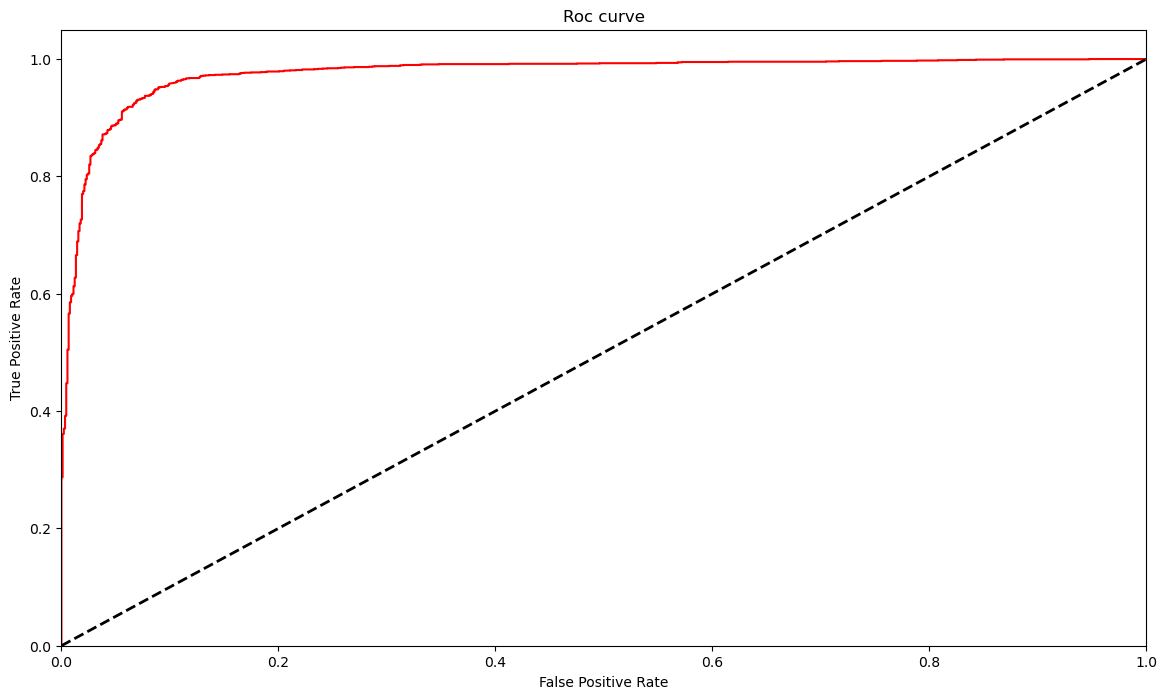

In [79]:
# visualisation

fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Let's see if our model has some bias or variance problem ploting its learning curve:


In [80]:
# using learning curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X1_train, y1_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [81]:
# fonction plot_learning_curve

def plot_learning_curve(X4, y4, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


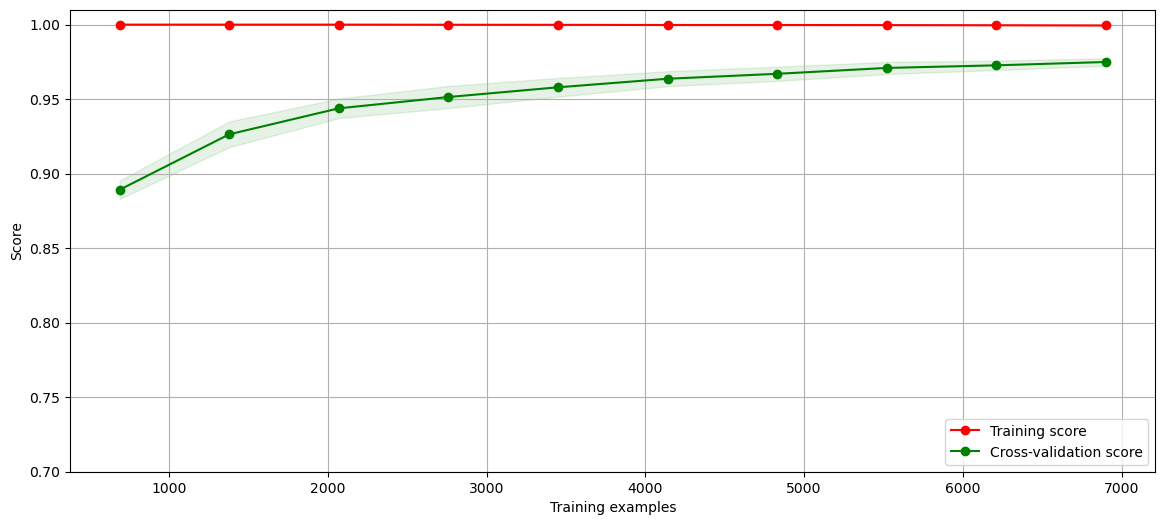

In [82]:
# visualization

plot_learning_curve(X1_train, y1_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()

It looks like there isn't a big bias or variance problem, but it is clear that our model would work better with more data.
if we can get more labeled data the model performance will increase.

# Examples

We are going to apply the obtained machine learning model to some example text.
If the output is 1 it means that the text has a positive sentiment associated:

In [83]:
grid_svm.predict([" a perfect world cup in Qatar"])


array([1])

In [84]:
grid_svm.predict(["Unfortunately, the temperature is extreme in this country organizing the World Cup"])

array([0])

# Model deployment

In [85]:
import joblib
joblib.dump(grid_svm, 'Sentiment Analysis World cup 2022-tweets.joblib')

['Sentiment Analysis World cup 2022-tweets.joblib']

In [86]:
# Load the saved model from a file
#import joblib
loaded_model = joblib.load('Sentiment Analysis World cup 2022-tweets.joblib')

In [87]:
# Make predictions using the loaded model
predictions = loaded_model.predict(['The World Cup in Qatar is poorly organized.'])
if predictions ==0:
    print('negative sentiment')
else:
    print('positive sentiment')

negative sentiment


In [92]:
# Make predictions using the loaded model
predictions = loaded_model.predict(['The World Cup in Qatar is not cup.'])
if predictions ==0:
    print('negative sentiment')
else:
    print('positive sentiment')

negative sentiment


In [93]:
# Make predictions using the loaded model
predictions = loaded_model.predict(['beatiful Cup in Qatar.'])
if predictions ==0:
    print('negative sentiment')
else:
    print('positive sentiment')

positive sentiment
